In [1]:
import numpy as np
import matplotlib.pylab as plt
import tidy3d as td
import tidy3d.web as web
from tidy3d.plugins.dispersion import DispersionFitter

In [2]:
# Materials
silver = td.material_library["Ag"]
# Check which models we have for silver
silver_variants = silver.variants
# print("variants for silver include: ", list(silver_variants.keys()))
silver = silver_variants["JohnsonChristy1972"]
# Define dispersionless silica as the substrate below the nanoslit
silica = td.Medium(permittivity=2.117)
air = td.Medium(permittivity=1.0)

# Check the dispersion
# silver.medium.nk_model(frequency=freq_max)


In [3]:
# Define the dimensions of the slit
w = 0.06  # 60 nm
l = 0.3  # 300 nm
h = 0.2  # 200 nm

# Define the wavelength range of interest hence the frequency as well
l_min = 0.400  # 400 nm
l_max = 1.200  # 1200 nm 
freq_min = td.C_0 / l_max
freq_max = td.C_0 / l_min

# Size and position of the slabs
x_material = 5
y_material = 5
silica_thickness = 2
silica_center = - silica_thickness / 2

# Source and monitor position
source_pos = 1
mon_pos = -1

# Simulation size
sim_size = (4, 4, 2.5)

# The time dependence of the plane wave
f_central = (freq_max+freq_min)/2
f_width = (freq_max-freq_min)

# The run time of the simulation
run_time = 20 / f_width

In [4]:
# Create the structures

silver_film = td.Structure(
    geometry=td.Box(center=(0, 0, h/2), size=(x_material, y_material, h)), 
                    medium=silver.medium,
)
slit = td.Structure(geometry=td.Box(center=(0, 0, h/2), size=(w, l, h)), 
                    medium=air,
)
silica_substrate = td.Structure(geometry=td.Box(center=(0, 0, silica_center), size=(x_material, y_material, silica_thickness)),
                                medium=silica,
)


In [5]:
# Define the source
gaussian = td.GaussianPulse(freq0=f_central, fwidth=f_width)
# Plane wave propagating in minus z
plane_wave = td.PlaneWave(
    center=(0, 0, source_pos),
    size=(td.inf, td.inf, 0),
    source_time=gaussian,
    direction='-',
    pol_angle=0,
    )

In [6]:
N_freqs = 101
mon_freqs = np.linspace(freq_min, freq_max, N_freqs)

mon_field = td.FieldMonitor(
    center=(0, 0, mon_pos),
    size=(td.inf, td.inf, 0),
    fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"],
    freqs=mon_freqs,
    name='field',
)

mon_flux = td.FluxMonitor(
    center=(0, 0, mon_pos),
    size=(td.inf, td.inf, 0),
    freqs=mon_freqs,
    name='flux',
)

In [7]:
# Define the simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=20, wavelength=l_min),
    structures=[silver_film, slit, silica_substrate],
    sources=[plane_wave],
    monitors=[mon_field, mon_flux],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


In [8]:
# Define the reference simulation without the slit
run_time = 20 / f_width
sim_ref = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=20, wavelength=l_min),
    structures=[silver_film, silica_substrate],
    sources=[plane_wave],
    monitors=[mon_field, mon_flux],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)

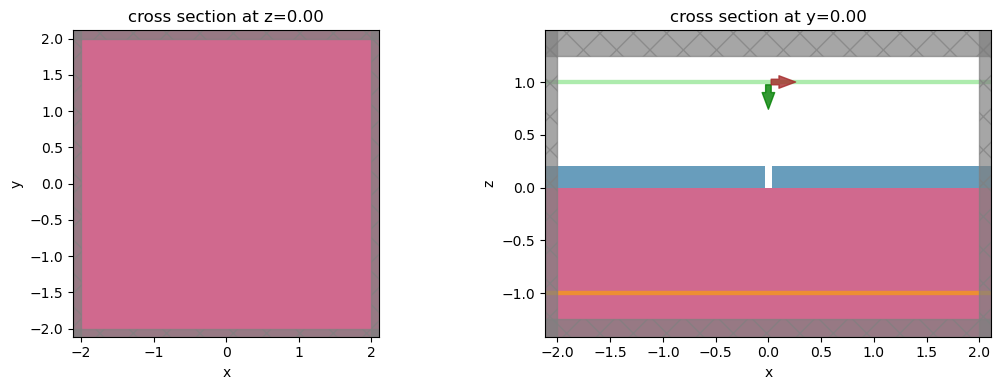

In [9]:
# Plot the layout for the simulation
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(11, 4))
sim.plot(z=0, ax=ax1)
sim.plot(y=0, ax=ax2)
plt.show()

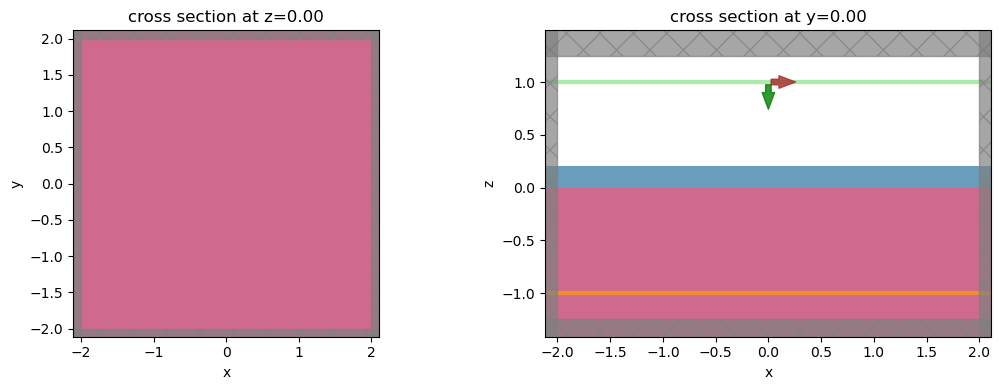

In [10]:
# Plot the layout for the reference simulation
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(11, 4))
sim_ref.plot(z=0, ax=ax1)
sim_ref.plot(y=0, ax=ax2)
plt.show()

In [11]:
job = web.Job(simulation=sim_ref, task_name="silver_film_without_slit", verbose=True)
sim_ref_data = job.run(path="data/silver_film_without_slit.hdf5")

[12:23:56] Created task 'silver_film_without_slit' with task_id                                       ]8;id=477884;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=864442;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#189\189]8;;\
           'fdve-f6ab1bdb-202b-4e37-ae55-a406f48a1902v1'.                                                          

           View task using web UI at                                                                  ]8;id=590710;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=897175;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#191\191]8;;\
           ]8;id=457450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6ab1bdb-202b-4e37-ae55-a406f48a1902v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=817588;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6ab1bdb-202b-4e37-ae55-a406f48a1902v1\taskId]8;;\]8;id=457450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6ab1bdb-202b-4e37-ae55-a406f48a1902v1\=]8;;\]8;id=36952;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6ab1bdb-202b-4e37-ae55-a406f48a1902v1\fdve]8;;\]8;id=457450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6ab1bdb-202b-4e37-ae55-a406f48a1902v1\-f6ab1bdb-202b-4e37-ae55-a406f48a190]8;;\              
           ]8;id=457450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6ab1bdb-202b-4e37-ae55-a406f48a1902v1\2v1']8;;\.                                                                                                   

Output()

[12:23:59] status = queued                                                                            ]8;id=243597;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=140901;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#363\363]8;;\

Output()

[12:24:02] status = preprocess                                                                        ]8;id=986442;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=532315;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#357\357]8;;\

[12:24:07] Maximum FlexCredit cost: 0.046. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=339887;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=433714;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#343\343]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=933354;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=866783;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#379\379]8;;\

           running solver                                                                             ]8;id=442338;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=150306;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#389\389]8;;\

           To cancel the simulation, use 'web.delete(task_id)' or delete the task in the web UI.      ]8;id=529732;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=568490;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#390\390]8;;\
           Terminating the Python script will not stop the job running on the cloud.                               

Output()

[12:24:34] early shutoff detected, exiting.                                                           ]8;id=943945;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=407271;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#407\407]8;;\

           status = postprocess                                                                       ]8;id=935888;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=233404;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#424\424]8;;\

Output()

[12:25:21] status = success                                                                           ]8;id=638249;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=578420;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#431\431]8;;\

Output()

[12:26:45] loading SimulationData from data/silver_film_without_slit.hdf5                             ]8;id=864907;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=935920;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#609\609]8;;\

In [12]:
job = web.Job(simulation=sim, task_name="silver_film_with_slit", verbose=True)
sim_data = job.run(path="data/silver_film_with_slit.hdf5")

[12:26:53] Created task 'silver_film_with_slit' with task_id                                          ]8;id=500679;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=192463;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#189\189]8;;\
           'fdve-575673f2-8c7a-4d12-8522-38b3eea211b5v1'.                                                          

           View task using web UI at                                                                  ]8;id=595240;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=382241;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#191\191]8;;\
           ]8;id=493438;https://tidy3d.simulation.cloud/workbench?taskId=fdve-575673f2-8c7a-4d12-8522-38b3eea211b5v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=581111;https://tidy3d.simulation.cloud/workbench?taskId=fdve-575673f2-8c7a-4d12-8522-38b3eea211b5v1\taskId]8;;\]8;id=493438;https://tidy3d.simulation.cloud/workbench?taskId=fdve-575673f2-8c7a-4d12-8522-38b3eea211b5v1\=]8;;\]8;id=548142;https://tidy3d.simulation.cloud/workbench?taskId=fdve-575673f2-8c7a-4d12-8522-38b3eea211b5v1\fdve]8;;\]8;id=493438;https://tidy3d.simulation.cloud/workbench?taskId=fdve-575673f2-8c7a-4d12-8522-38b3eea211b5v1\-575673f2-8c7a-4d12-8522-38b3eea211b]8;;\              
           ]8;id=493438;https://tidy3d.simulation.cloud/workbench?taskId=fdve-575673f2-8c7a-4d12-8522-38b3eea211b5v1\5v1']8;;\.                                                                                                   

Output()

[12:26:57] status = queued                                                                            ]8;id=916124;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=435349;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#363\363]8;;\

Output()

[12:27:00] status = preprocess                                                                        ]8;id=433249;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=995710;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#357\357]8;;\

[12:27:04] Maximum FlexCredit cost: 0.048. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=805580;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=541707;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#343\343]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=876307;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=109341;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#379\379]8;;\

           running solver                                                                             ]8;id=307967;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=827836;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#389\389]8;;\

           To cancel the simulation, use 'web.delete(task_id)' or delete the task in the web UI.      ]8;id=668958;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=268231;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#390\390]8;;\
           Terminating the Python script will not stop the job running on the cloud.                               

Output()

Output()

[12:27:29] status = postprocess                                                                       ]8;id=317610;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=614826;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#431\431]8;;\

[12:28:33] status = success                                                                           ]8;id=871288;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=364963;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#431\431]8;;\

Output()

[12:29:44] loading SimulationData from data/silver_film_with_slit.hdf5                                ]8;id=165891;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=136248;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#609\609]8;;\

[12:29:45] WARNING: Simulation final field decay value of 5.84e-05 is greater than the simulation     ]8;id=760328;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=595806;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#616\616]8;;\
           shutoff threshold of 1e-05. Consider simulation again with large run_time duration for                  
           more accurate results.                                                                                  

In [22]:
transmission0 = sim_ref_data['flux'].flux
transmission = sim_data['flux'].flux
transmission_normalized = transmission / transmission0

# f, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 7), tight_layout=True)
# transmission0.plot(ax=ax1, label='without slit')
# transmission.plot(ax=ax1, label='with slit')
# transmission_normalized.plot(ax=ax2)
# ax1.legend()
# ax1.set_title('raw transmission')
# ax2.set_title('normalized transmission')
# plt.show()

Text(0.5, 1.0, 'Transmission with slit')

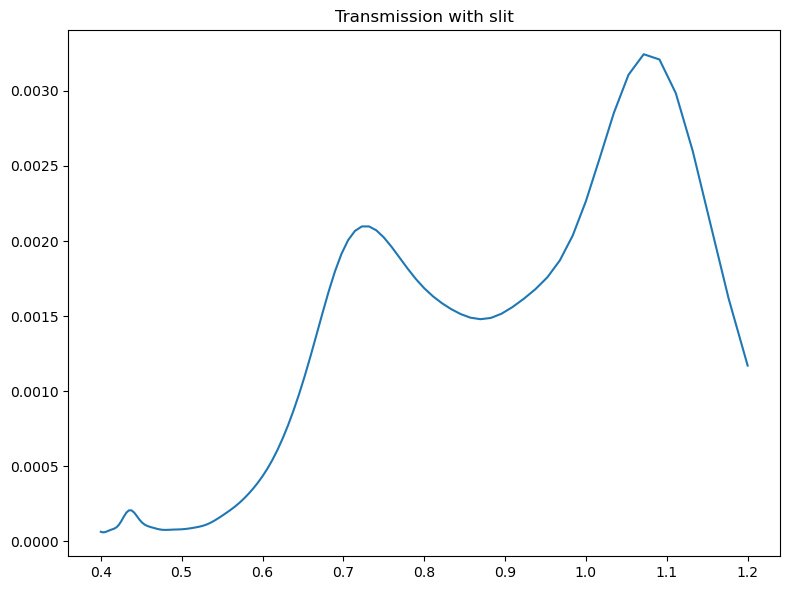

In [24]:
f, ax_single = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
data = -transmission.data  # The normal was put in the wrong way
wavelength_array = td.C_0 / mon_freqs
# transmission.plot(ax=ax_single, label='with slit')
ax_single.plot(wavelength_array, data)
ax_single.set_title("Transmission with slit")



In [26]:
wavelength_array
td.C_0

299792458000000.0